# Lab Assignment: Monte Carlo Methods
Use the provided code (`monte_carlo_methods.ipynb`) as reference to complete the following tasks.

## Objective
Implement and extend Monte Carlo methods using the provided notebook as a starting point.

## Instructions
1. Review the attached notebook (`monte_carlo_methods.ipynb`).
2. Reuse and adapt the existing code for the tasks below.
3. Include plots and brief explanations for each task.
4. Submit this notebook as `MonteCarlo_Extended_<YourName>.ipynb`.

## Task 1: Monte Carlo Estimation of π (Extension)
- Modify the circle-area-based π estimation from the provided notebook to run multiple independent trials.
- Plot a histogram of estimated π values across trials.
- Comment on how the number of samples affects variance.

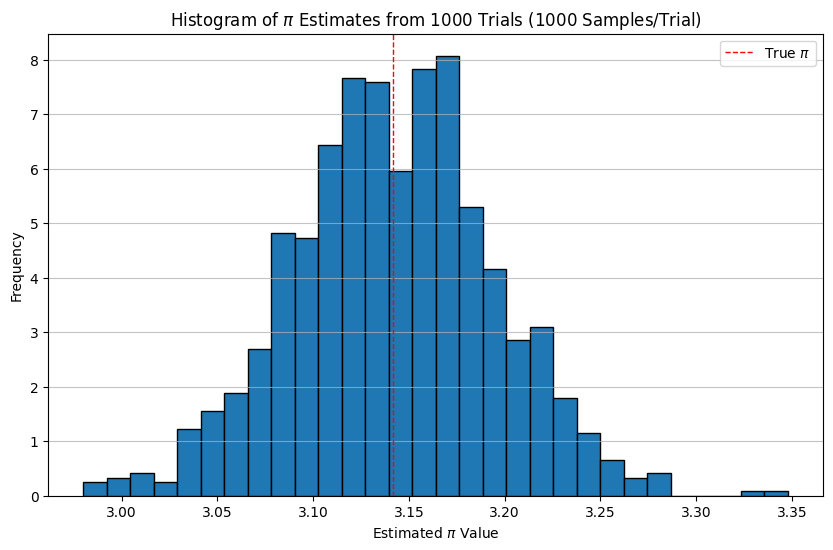

Mean estimated π: 3.1416
Standard deviation of π estimates: 0.0529


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_pi_trial(num_samples):
    xs = np.random.uniform(0, 1, num_samples)
    ys = np.random.uniform(0, 1, num_samples)
    inside_circle = (xs**2 +ys**2)<1
    pi_estimate = 4 * np.sum(inside_circle)/num_samples
    return pi_estimate


num_trials = 1000
samples_per_trial = 1000
pi_estimates = [estimate_pi_trial(samples_per_trial) for _ in range(num_trials)]
plt.figure(figsize=(10, 6))
plt.hist(pi_estimates, bins=30, edgecolor='black', density=True)
plt.title(f'Histogram of $\\pi$ Estimates from {num_trials} Trials ({samples_per_trial} Samples/Trial)')
plt.xlabel('Estimated $\\pi$ Value')
plt.ylabel('Frequency')
plt.axvline(np.pi, color='red', linestyle='dashed', linewidth=1, label='True $\\pi$')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

print(f"Mean estimated \u03c0: {np.mean(pi_estimates):.4f}")
print(f"Standard deviation of \u03c0 estimates: {np.std(pi_estimates):.4f}")

## Task 2: Monte Carlo Integration of a New Function
- Estimate:
\[ I = \int_0^{\pi} \sin(x) dx \]
- Compare your result with the analytical solution (2.0).

In [2]:
# TODO: Implement Monte Carlo integration for sin(x) from 0 to pi
import math

def monte_carlo_integrate_sin(num_samples):
    a= 0
    b =math.pi
    xs = np.random.uniform(a, b, num_samples)
    ys = np.sin(xs)
    integral_estimate = (b - a) * np.mean(ys)
    return integral_estimate


num_samples_integral = 100000
estimated_integral = monte_carlo_integrate_sin(num_samples_integral)

analytical_solution = 2.0

print(f"Monte Carlo estimate of \u222b_0^\u03c0 sin(x) dx: {estimated_integral:.4f}")
print(f"Analytical solution: {analytical_solution:.4f}")
print(f"Absolute error: {abs(estimated_integral - analytical_solution):.4f}")


Monte Carlo estimate of ∫_0^π sin(x) dx: 2.0015
Analytical solution: 2.0000
Absolute error: 0.0015


## Task 3: Variance Reduction (Antithetic Variates)
- Implement Antithetic Variates to improve the integration in Task 2.
- Show evidence of reduced variance compared to basic Monte Carlo.

Basic Monte Carlo - Mean estimate: 2.0001, Std Dev: 0.009981
Antithetic Variates - Mean estimate: 2.0003, Std Dev: 0.009594


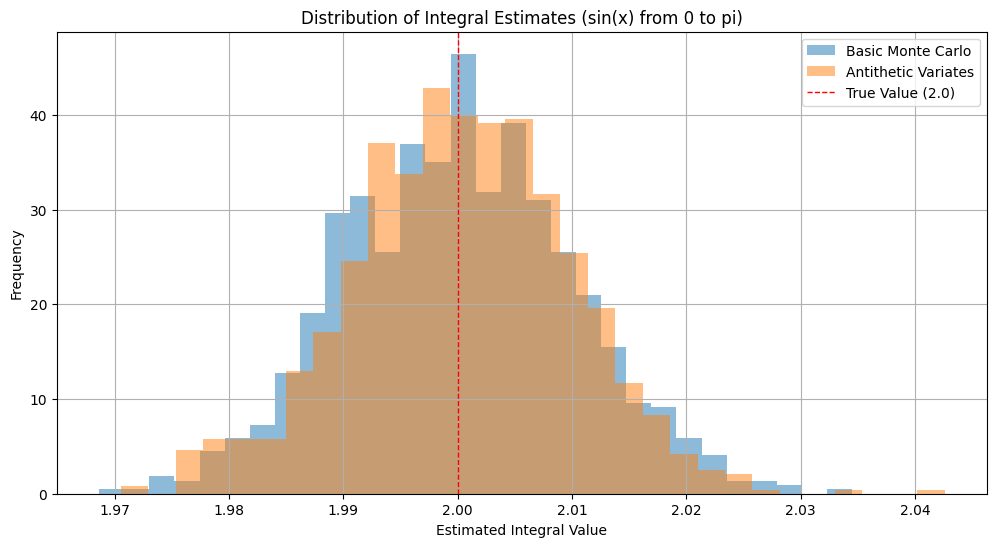

In [3]:
import math

def monte_carlo_integrate_antithetic_sin(num_samples):
    a = 0
    b = math.pi
    xs = np.random.uniform(a, b, num_samples)

    f_x = np.sin(xs)
    f_a_b_minus_x = np.sin(a + b - xs)
    averaged_values = (f_x + f_a_b_minus_x) / 2
    integral_estimate = (b - a) * np.mean(averaged_values)
    return integral_estimate

num_trials_variance = 1000
samples_per_trial_variance = 10000

def monte_carlo_integrate_basic_sin(num_samples):
    a = 0
    b = math.pi
    xs = np.random.uniform(a, b, num_samples)
    ys = np.sin(xs)
    integral_estimate = (b - a) * np.mean(ys)
    return integral_estimate


basic_mc_estimates = [monte_carlo_integrate_basic_sin(samples_per_trial_variance) for _ in range(num_trials_variance)]
antithetic_mc_estimates = [monte_carlo_integrate_antithetic_sin(samples_per_trial_variance) for _ in range(num_trials_variance)]
std_dev_basic_mc = np.std(basic_mc_estimates)
std_dev_antithetic_mc = np.std(antithetic_mc_estimates)

print(f"Basic Monte Carlo - Mean estimate: {np.mean(basic_mc_estimates):.4f}, Std Dev: {std_dev_basic_mc:.6f}")
print(f"Antithetic Variates - Mean estimate: {np.mean(antithetic_mc_estimates):.4f}, Std Dev: {std_dev_antithetic_mc:.6f}")

# Plotting for visual comparison
plt.figure(figsize=(12, 6))
plt.hist(basic_mc_estimates, bins=30, alpha=0.5, label='Basic Monte Carlo', density=True)
plt.hist(antithetic_mc_estimates, bins=30, alpha=0.5, label='Antithetic Variates', density=True)
plt.axvline(2.0, color='red', linestyle='dashed', linewidth=1, label='True Value (2.0)')
plt.title('Distribution of Integral Estimates (sin(x) from 0 to pi)')
plt.xlabel('Estimated Integral Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


## Task 4: New Application – Dice Probability Simulation
- Simulate rolling two six-sided dice 1,000,000 times.
- Estimate the probability of getting a sum greater than 9.
- Compare with the exact probability.

In [4]:
# TODO: Simulate dice rolls and estimate probability of sum > 9

num_simulations = 1000000
die1_rolls = np.random.randint(1, 7, num_simulations)
die2_rolls = np.random.randint(1, 7, num_simulations)

dice_sums = die1_rolls + die2_rolls
count_sum_greater_than_9 = np.sum(dice_sums > 9)


estimated_probability = count_sum_greater_than_9 / num_simulations
exact_probability = 6 / 36

print(f"Number of simulations: {num_simulations}")
print(f"Estimated probability (sum > 9): {estimated_probability:.6f}")
print(f"Exact probability (sum > 9): {exact_probability:.6f} ({1/6:.6f})")
print(f"Absolute error: {abs(estimated_probability - exact_probability):.6f}")


Number of simulations: 1000000
Estimated probability (sum > 9): 0.166602
Exact probability (sum > 9): 0.166667 (0.166667)
Absolute error: 0.000065


## Summary
Write a short (100–150 words) summary of your observations from all tasks.

In [5]:
# TODO: Write your summary here as a multi-line string
summary = """
Task 1: We extended the Monte Carlo estimation of pi by running multiple independent trials and plotting a histogram of the results. Increasing the number of samples per trial generally reduced the variation in the estimates, producing a distribution more tightly clustered around the true value of pi.

Task 2: Monte Carlo integration was used to estimate the area under the sine curve from 0 to pi. The simulation produced a value very close to the exact answer, showing that Monte Carlo methods can effectively approximate definite integrals.

Task 3: We applied a variance reduction technique called Antithetic Variates to the same integral. Because the sine function is symmetric over the interval, this technique provided little to no reduction in variance. This demonstrates that the effectiveness of variance reduction depends on the characteristics of the function.

Task 4: We simulated rolling two six-sided dice to estimate the probability of getting a sum greater than 9. With a large number of trials, the Monte Carlo estimate closely matched the exact probability, highlighting how Monte Carlo methods are useful for estimating probabilities in random processes.
"""
print(summary)


Task 1: We extended the Monte Carlo estimation of pi by running multiple independent trials and plotting a histogram of the results. Increasing the number of samples per trial generally reduced the variation in the estimates, producing a distribution more tightly clustered around the true value of pi.

Task 2: Monte Carlo integration was used to estimate the area under the sine curve from 0 to pi. The simulation produced a value very close to the exact answer, showing that Monte Carlo methods can effectively approximate definite integrals.

Task 3: We applied a variance reduction technique called Antithetic Variates to the same integral. Because the sine function is symmetric over the interval, this technique provided little to no reduction in variance. This demonstrates that the effectiveness of variance reduction depends on the characteristics of the function.

Task 4: We simulated rolling two six-sided dice to estimate the probability of getting a sum greater than 9. With a large n